In [103]:
#import pm4py 

# Read the log
##log = pm4py.read_xes('./Hospital_log.xes')

In [104]:
# save log as csv 
#pm4py.convert_to_dataframe(log).to_csv('Hospital_log.csv', index=False)

In [105]:
import sys 
import os
from pathlib import Path 
import pandas as pd
import numpy as np
import math

df = pd.read_csv('FirstAssignmentBPI-DataSet2.csv')

In [106]:
pd.set_option('display.max_columns', None)
df.head()

,Case ID,Activity,Resource,Start Timestamp,Complete Timestamp,Variant,Variant index,LoanGoal,ApplicationType,RequestedAmount
0,Application_652823628,Complete application,User_17,2016-01-02 11:45:22.429,2016-01-02 11:45:22.429,Variant 3,3,Existing loan takeover,New credit,20000.0
1,Application_652823628,Calling client,User_52,2016-01-02 12:30:28.631,2016-01-02 12:30:28.631,Variant 3,3,Existing loan takeover,New credit,20000.0
2,Application_652823628,Validation,User_117,2016-01-13 14:10:55.145,2016-01-13 14:10:55.145,Variant 3,3,Existing loan takeover,New credit,20000.0
3,Application_652823628,Request incomplete files,User_115,2016-01-14 10:16:20.972,2016-01-14 10:16:20.972,Variant 3,3,Existing loan takeover,New credit,20000.0
4,Application_652823628,Validation,User_117,2016-01-14 14:39:51.494,2016-01-14 14:39:51.494,Variant 3,3,Existing loan takeover,New credit,20000.0


In [107]:
p = Path("__file__").resolve().parents[2]
sys.path.append(os.path.abspath(str(p)))
print(p)

/home/botgod/Git/Hub/seminarcode


In [108]:
#from PyProM.src.data.Eventlog import Eventlog

In [109]:
def remove_micro_seconds(x):
	if len(x) > 19:
		x = x[:19]
	return x

def to_minute(x):
	if np.isnan(x.seconds):
		return x
	#return int(x.seconds/60)
	return math.ceil(x.seconds/60)

In [110]:
path = './FirstAssignmentBPI-DataSet2.csv'
elog = pd.read_csv(path, sep=',')

In [111]:
# rename a column
elog = elog.rename(columns={'Case ID': 'CASE_ID', 'Activity': 'Activity', 'Resource': 'Resource', 'Start Timestamp': 'StartTimestamp', 'Complete Timestamp': 'CompleteTimestamp', 'RequestedAmount': 'Amount'})

In [112]:
elog.columns

Index(['CASE_ID', 'Activity', 'Resource', 'StartTimestamp',
       'CompleteTimestamp', 'Variant', 'Variant index', 'LoanGoal',
       'ApplicationType', 'RequestedAmount'],
      dtype='object')

In [113]:
elog.head()

,CASE_ID,Activity,Resource,StartTimestamp,CompleteTimestamp,Variant,Variant index,LoanGoal,ApplicationType,RequestedAmount
0,Application_652823628,Complete application,User_17,2016-01-02 11:45:22.429,2016-01-02 11:45:22.429,Variant 3,3,Existing loan takeover,New credit,20000.0
1,Application_652823628,Calling client,User_52,2016-01-02 12:30:28.631,2016-01-02 12:30:28.631,Variant 3,3,Existing loan takeover,New credit,20000.0
2,Application_652823628,Validation,User_117,2016-01-13 14:10:55.145,2016-01-13 14:10:55.145,Variant 3,3,Existing loan takeover,New credit,20000.0
3,Application_652823628,Request incomplete files,User_115,2016-01-14 10:16:20.972,2016-01-14 10:16:20.972,Variant 3,3,Existing loan takeover,New credit,20000.0
4,Application_652823628,Validation,User_117,2016-01-14 14:39:51.494,2016-01-14 14:39:51.494,Variant 3,3,Existing loan takeover,New credit,20000.0


In [114]:
elog['CompleteTimestamp'] = elog['CompleteTimestamp'].apply(remove_micro_seconds)

In [115]:
elog.head()

,CASE_ID,Activity,Resource,StartTimestamp,CompleteTimestamp,Variant,Variant index,LoanGoal,ApplicationType,RequestedAmount
0,Application_652823628,Complete application,User_17,2016-01-02 11:45:22.429,2016-01-02 11:45:22,Variant 3,3,Existing loan takeover,New credit,20000.0
1,Application_652823628,Calling client,User_52,2016-01-02 12:30:28.631,2016-01-02 12:30:28,Variant 3,3,Existing loan takeover,New credit,20000.0
2,Application_652823628,Validation,User_117,2016-01-13 14:10:55.145,2016-01-13 14:10:55,Variant 3,3,Existing loan takeover,New credit,20000.0
3,Application_652823628,Request incomplete files,User_115,2016-01-14 10:16:20.972,2016-01-14 10:16:20,Variant 3,3,Existing loan takeover,New credit,20000.0
4,Application_652823628,Validation,User_117,2016-01-14 14:39:51.494,2016-01-14 14:39:51,Variant 3,3,Existing loan takeover,New credit,20000.0


In [116]:
elog['StartTimestamp'] = elog['StartTimestamp'].apply(remove_micro_seconds)

In [117]:
elog.head()

,CASE_ID,Activity,Resource,StartTimestamp,CompleteTimestamp,Variant,Variant index,LoanGoal,ApplicationType,RequestedAmount
0,Application_652823628,Complete application,User_17,2016-01-02 11:45:22,2016-01-02 11:45:22,Variant 3,3,Existing loan takeover,New credit,20000.0
1,Application_652823628,Calling client,User_52,2016-01-02 12:30:28,2016-01-02 12:30:28,Variant 3,3,Existing loan takeover,New credit,20000.0
2,Application_652823628,Validation,User_117,2016-01-13 14:10:55,2016-01-13 14:10:55,Variant 3,3,Existing loan takeover,New credit,20000.0
3,Application_652823628,Request incomplete files,User_115,2016-01-14 10:16:20,2016-01-14 10:16:20,Variant 3,3,Existing loan takeover,New credit,20000.0
4,Application_652823628,Validation,User_117,2016-01-14 14:39:51,2016-01-14 14:39:51,Variant 3,3,Existing loan takeover,New credit,20000.0


In [118]:
elog['CompleteTimestamp'].dtype
# change type of column dt.date 
elog['CompleteTimestamp'] = pd.to_datetime(elog['CompleteTimestamp'], format='%Y-%m-%d %H:%M:%S')
elog['StartTimestamp'] = pd.to_datetime(elog['StartTimestamp'], format='%Y-%m-%d %H:%M:%S')


In [119]:
elog['Duration'] = (elog['CompleteTimestamp'] - elog['StartTimestamp']).apply(to_minute)


/tmp/ipykernel_24998/2645534060.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(elog['Duration'], bins=100, kde=False)


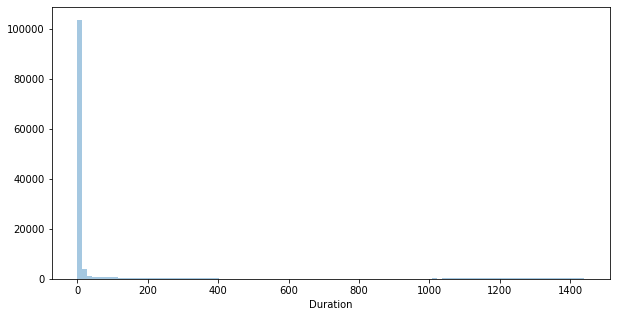

In [120]:
# plot the distribution of duration
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.distplot(elog['Duration'], bins=100, kde=False)
plt.show()


In [121]:
# drop rows with missing values
elog.dropna(subset=['Resource', 'StartTimestamp', 'CompleteTimestamp'],inplace=True)

/tmp/ipykernel_24998/1379670181.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(elog['Duration'], bins=100, kde=False)


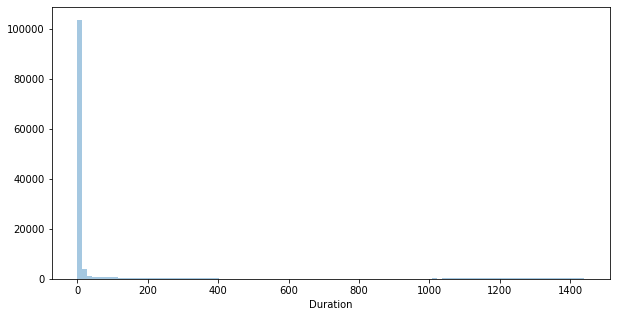

In [122]:

plt.figure(figsize=(10, 5))
sns.distplot(elog['Duration'], bins=100, kde=False)
plt.show()

In [123]:
# make the distribution of duration more normal
elog['Duration_log_transformation'] = np.log(elog['Duration'])

/home/botgod/anaconda3/envs/apm/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [124]:
# remove rows with duration less than 0
elog = elog.loc[elog['Duration'] >= 0]

In [125]:
elog.head()

,CASE_ID,Activity,Resource,StartTimestamp,CompleteTimestamp,Variant,Variant index,LoanGoal,ApplicationType,RequestedAmount,Duration,Duration_log_transformation
0,Application_652823628,Complete application,User_17,2016-01-02 11:45:22,2016-01-02 11:45:22,Variant 3,3,Existing loan takeover,New credit,20000.0,0,-inf
1,Application_652823628,Calling client,User_52,2016-01-02 12:30:28,2016-01-02 12:30:28,Variant 3,3,Existing loan takeover,New credit,20000.0,0,-inf
2,Application_652823628,Validation,User_117,2016-01-13 14:10:55,2016-01-13 14:10:55,Variant 3,3,Existing loan takeover,New credit,20000.0,0,-inf
3,Application_652823628,Request incomplete files,User_115,2016-01-14 10:16:20,2016-01-14 10:16:20,Variant 3,3,Existing loan takeover,New credit,20000.0,0,-inf
4,Application_652823628,Validation,User_117,2016-01-14 14:39:51,2016-01-14 14:39:51,Variant 3,3,Existing loan takeover,New credit,20000.0,0,-inf


In [126]:
# round up the duration to the nearest integer
#def round_up(x):
#    return int(x) + 1
    
#elog['Duration'] = elog['Duration'].apply(round_up)

In [127]:
len(elog)

128227

In [128]:
elog.head()

,CASE_ID,Activity,Resource,StartTimestamp,CompleteTimestamp,Variant,Variant index,LoanGoal,ApplicationType,RequestedAmount,Duration,Duration_log_transformation
0,Application_652823628,Complete application,User_17,2016-01-02 11:45:22,2016-01-02 11:45:22,Variant 3,3,Existing loan takeover,New credit,20000.0,0,-inf
1,Application_652823628,Calling client,User_52,2016-01-02 12:30:28,2016-01-02 12:30:28,Variant 3,3,Existing loan takeover,New credit,20000.0,0,-inf
2,Application_652823628,Validation,User_117,2016-01-13 14:10:55,2016-01-13 14:10:55,Variant 3,3,Existing loan takeover,New credit,20000.0,0,-inf
3,Application_652823628,Request incomplete files,User_115,2016-01-14 10:16:20,2016-01-14 10:16:20,Variant 3,3,Existing loan takeover,New credit,20000.0,0,-inf
4,Application_652823628,Validation,User_117,2016-01-14 14:39:51,2016-01-14 14:39:51,Variant 3,3,Existing loan takeover,New credit,20000.0,0,-inf


/home/botgod/anaconda3/envs/apm/lib/python3.10/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


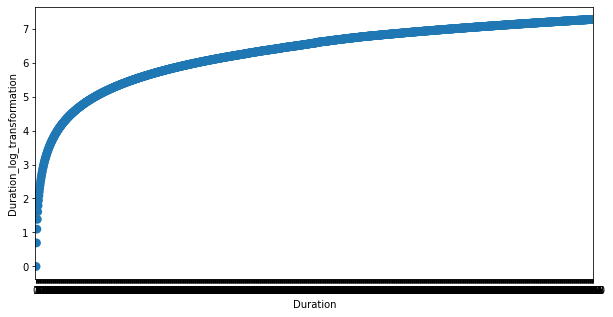

In [129]:

# plot the distribution of duration_log_transformation
plt.figure(figsize=(10, 5))
sns.pointplot(y=elog['Duration_log_transformation'], x=elog['Duration'], data=elog, join=False)
plt.show()

In [130]:
len(elog)

128227

In [131]:
log = pd.read_csv('../../prediction/training_data.csv', sep=',')

In [132]:
log.columns

Index(['Unnamed: 0', 'id', 'state', 'resource', 'start_timestamp',
       'complete_timestamp', 'dur', 'next_state', 'next_time', 'next_dur',
       'next_resource', 'elapsed_time', 'total_time', 'remaining_time',
       'history', 'res_history', 'total_q', 'queue_W-Afhandelen leads-START',
       'queue_W-Beoordelen fraude-START', 'queue_W-Completeren aanvraag-START',
       'queue_W-Nabellen incomplete dossiers-START',
       'queue_W-Nabellen offertes-START', 'queue_W-Valideren aanvraag-START'],
      dtype='object')

/tmp/ipykernel_24998/1043983960.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log['dur'], bins=200, kde=False)


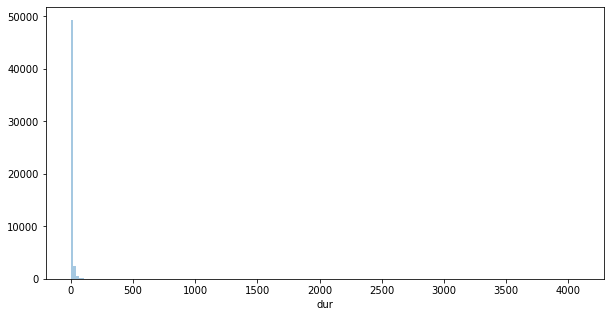

In [133]:
# check the distribution of duration
plt.figure(figsize=(10, 5))
sns.distplot(log['dur'], bins=200, kde=False)
plt.show()